# Introdução

A análise abaixo foi feita utlizando os dados fornecidos pela equipe de engenharia de dados durante o desafio da Petlove.

Pontos principais do Desafio:
    - Ressaltar os aprendizados da análise dos dados.
    - Sugestão para os próximos passos.

Perguntas que tentaremos responder com a análise: 
    - Qual o estado com o maior volume de vendas
    - Qual canal converte mais venda

## Carregando Bibliotecas

##### importante que tenha as bibliotecas baixadas em sua maquina (pandas, seaborn, sidetable)
##### Caso não tenha instalado em sua máquina as seguintes bibliotecas é só descomentar os scripts abaixo e rodar a célula.

In [ ]:
# !pip install pandas
# !pip install seaborn
# !pip install sidetable

In [34]:
import pandas as pd
import numpy as np
import sidetable as stb
import datetime as dt

# bibiliotecas para visualizacao 
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo das visualizacoes
plt.style.use('ggplot')

## Carregando o Dataset

In [52]:
df = pd.read_csv('./data/data-test-analytics.csv')

### Verificando Valores Nulos e o Tipo de Dados

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  10000 non-null  object        
 1   created_at          10000 non-null  datetime64[ns]
 2   updated_at          10000 non-null  datetime64[ns]
 3   deleted_at          505 non-null    datetime64[ns]
 4   name_hash           10000 non-null  object        
 5   email_hash          10000 non-null  object        
 6   address_hash        10000 non-null  object        
 7   birth_date          10000 non-null  object        
 8   status              10000 non-null  object        
 9   version             10000 non-null  object        
 10  city                10000 non-null  object        
 11  state               10000 non-null  object        
 12  neighborhood        10000 non-null  object        
 13  last_date_purchase  10000 non-null  datetime64[

### Visualizando o Dataset

In [37]:
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [12]:
df.shape

(10000, 20)

### Formatando a Coluna que contem Datas do Dataset

In [53]:
list_date_cols = ['created_at', 'updated_at', 'deleted_at', 'last_date_purchase']

In [56]:
for col in list_date_cols:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%y %I:%M %p')
    df[col] = df[col].dt.strftime('%d/%m/%y %I:%M %p')

In [69]:
df.head()

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,15/08/17 07:05 AM,14/01/21 11:23 AM,NaN,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,14/01/21 11:23 AM,151.14,10,906.858,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,31/12/19 09:53 PM,08/01/21 11:23 AM,NaN,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,08/01/21 11:23 AM,236.99,4,236.992,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,07/03/19 11:46 PM,07/01/21 11:23 AM,NaN,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,07/01/21 11:23 AM,211.96,13,2331.512,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,21/07/18 10:17 AM,10/01/21 11:23 AM,NaN,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,10/01/21 11:23 AM,204.11,8,1224.679,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,08/06/18 12:09 PM,18/01/21 11:23 AM,NaN,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,18/01/21 11:23 AM,252.94,9,2023.528,8,31,crm


### Deletando as Colunas que não usaremos durante a Análise

In [58]:
df.drop(columns=['name_hash', 'email_hash', 'address_hash'], inplace=True)

In [59]:
df.columns

Index(['id', 'created_at', 'updated_at', 'deleted_at', 'birth_date', 'status',
       'version', 'city', 'state', 'neighborhood', 'last_date_purchase',
       'average_ticket', 'items_quantity', 'all_revenue', 'all_orders',
       'recency', 'marketing_source'],
      dtype='object')

### Arredondando Valores de algumas Colunas

In [67]:
list_col_values = ['all_revenue', 'average_ticket']

In [68]:
for col in list_col_values:
    df[col] = df[col].round(3)

# Análise Petlove

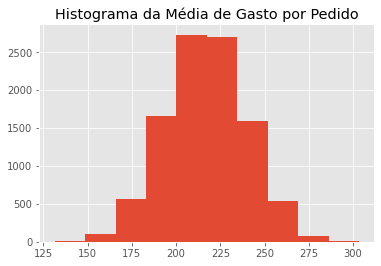

In [16]:
_ = plt.hist(df.average_ticket)
_ = plt.title('Histograma da Média de Gasto por Pedido')

In [25]:
df.state.value_counts(1)                  

state
TO    0.0409
GO    0.0403
RR    0.0396
PR    0.0385
RS    0.0382
AP    0.0381
RO    0.0381
AM    0.0380
CE    0.0378
RJ    0.0377
MS    0.0374
MG    0.0373
PB    0.0372
SC    0.0370
MT    0.0368
BA    0.0368
PE    0.0367
SE    0.0367
AC    0.0357
DF    0.0357
MA    0.0354
SP    0.0354
RN    0.0353
AL    0.0353
ES    0.0352
PA    0.0351
PI    0.0338
Name: proportion, dtype: float64

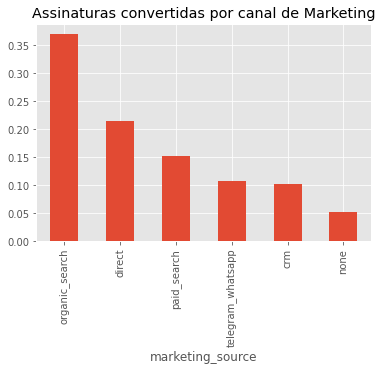

In [22]:
_ = df.marketing_source.value_counts(1).plot.bar()
_ = plt.title('Assinaturas convertidas por canal de Marketing')